In [1]:
#attention: written in the old mix_match_environment 
#need update

import matplotlib
import PIL
from PIL import Image
import scipy 
from matplotlib import image as img
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import cv2
from os.path import isfile, join
from os import listdir


In [2]:
# read the image first 
# image is a 3D arrage (M x N x 3) - M and N are the dimensions of the image 

# img = Image.open("../00_data/00_test_pic/frog_2.jpg")
image = cv2.imread("../00_data/00_test_pic/test.jpg")

In [3]:
# covert image into RGB values. 
# each pixel is a list fo 3 numbers, which describes Red, Green and Blue for the specific pixel
# the code decomposes each pixel and store the into respective list (red, green, blue)

b = []
g = []
r = []

for line in image:
    for pixel in line:
        temp_b, temp_g, temp_r = pixel
        b.append(temp_b)
        g.append(temp_g)
        r.append(temp_r)


In [4]:
df = pd.DataFrame({"blue" : b, "green" : g, "red" : r})

In [5]:
df

,blue,green,red
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
2742331,72,67,66
2742332,68,63,62
2742333,75,70,69
2742334,74,69,68


In [6]:
model = KMeans(n_clusters=3, init="random")
clusters = model.fit(df)

In [7]:
clusters

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [8]:
df["cluster"] = clusters.predict(df)

In [9]:
df["cluster"].value_counts()

2    1610695
1     738544
0     393097
Name: cluster, dtype: int64

In [10]:
clusters.cluster_centers_

array([[ 31.28776728,  27.1066207 ,  26.12230942],
       [104.91399016, 100.35486186,  99.91892005],
       [248.13305118, 248.05587212, 247.9494467 ]])

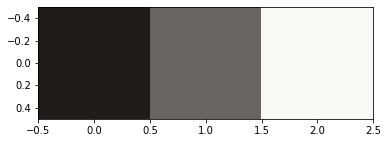

In [11]:
colors = []

for cluster_center in clusters.cluster_centers_:
    scaled_b, scaled_g, scaled_r = cluster_center
    colors.append((
                    scaled_b / 255,
                    scaled_g / 255,
                    scaled_r / 255
                  ))
    
plt.imshow([colors])
plt.show()

In [14]:
colors

[(0.12269712657156422, 0.10630047335062803, 0.10244042911182138),
 (0.411427412376049, 0.39354847787376845, 0.3918389021681732),
 (0.9730707889244702, 0.9727681259685137, 0.9723507713644556)]

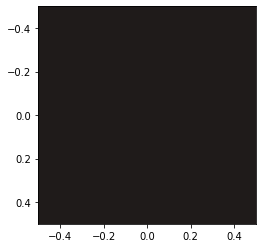

In [16]:
test = [(0.12269712657156422, 0.10630047335062803, 0.10244042911182138)]
plt.imshow([test])
plt.show()

In [17]:
# just a test to sea the variables

for cluster_center in clusters.cluster_centers_:
    scaled_r, scaled_g, scaled_b = cluster_center
    print(scaled_r, scaled_g, scaled_b)

31.287767275748877 27.106620704410147 26.12230942351445
104.9139901558925 100.35486185781096 99.91892005288416
248.1330511757399 248.055872121971 247.94944669793617


In [ ]:
# The example used scipy instead of Sklearn
# Example code also standardized the scale for each column of df

In [ ]:
# Try re-do the results inkl. standardization

In [18]:
df_2 = df.drop("cluster", axis=1).copy()

In [19]:
df_2

,blue,green,red
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
2742331,72,67,66
2742332,68,63,62
2742333,75,70,69
2742334,74,69,68


In [ ]:
# the exmample shows the scipy whiten function. However, it didn't work here.
# However, the whiten function suppose to divide each array by its stdv. So I will calculate it manually

In [20]:
b_std, g_std, r_std = df_2[['blue', 'green', 'red']].std() 

In [21]:
df_2 = df_2.assign(b_scaled = df_2["blue"] / b_std )
df_2 = df_2.assign(g_scaled = df_2["green"] / g_std )
df_2 = df_2.assign(r_scaled = df_2["red"] / r_std )

In [22]:
df_2.head()

,blue,green,red,b_scaled,g_scaled,r_scaled
0,255,255,255,2.890637,2.824433,2.812386
1,255,255,255,2.890637,2.824433,2.812386
2,255,255,255,2.890637,2.824433,2.812386
3,255,255,255,2.890637,2.824433,2.812386
4,255,255,255,2.890637,2.824433,2.812386


In [23]:
df_2 = df_2.drop(["blue", "green", "red"], axis = 1).copy()

In [24]:
df_2

,b_scaled,g_scaled,r_scaled
0,2.890637,2.824433,2.812386
1,2.890637,2.824433,2.812386
2,2.890637,2.824433,2.812386
3,2.890637,2.824433,2.812386
4,2.890637,2.824433,2.812386
...,...,...,...
2742331,0.816180,0.742106,0.727912
2742332,0.770837,0.697801,0.683796
2742333,0.850187,0.775335,0.760998
2742334,0.838852,0.764258,0.749969


In [25]:
model_2 = KMeans(n_clusters=3, init="random")
clusters_2 = model_2.fit(df_2)
df_2["cluster"] = clusters_2.predict(df_2)

In [26]:
df_2.cluster.value_counts()

1    1610692
0     738446
2     393198
Name: cluster, dtype: int64

In [27]:
clusters_2.cluster_centers_

array([[1.1893306 , 1.11159452, 1.10199287],
       [2.81279754, 2.74752134, 2.73462597],
       [0.35467831, 0.3002412 , 0.2882118 ]])

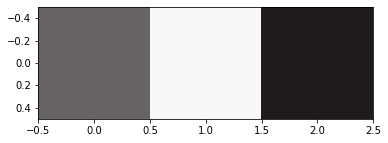

In [28]:
colors_2 = []

for cluster_center in clusters_2.cluster_centers_:
    scaled_b, scaled_g, scaled_r = cluster_center
    colors_2.append((
                    (scaled_b * b_std / 255),
                    (scaled_g * g_std / 255),
                    (scaled_r * r_std / 255)
                  ))

plt.imshow([colors_2])
plt.show()

In [29]:
colors_2

[(0.4114423233441126, 0.39356375517985814, 0.3918356271728474),
 (0.9730717032456544, 0.9727691101267253, 0.9723510119101846),
 (0.12269899262671721, 0.10630140055427577, 0.10247947643770514)]

In [30]:
color_1_r, color_1_g, color_1_b = colors_2[0]
color_2_r, color_2_g, color_2_b = colors_2[1]
color_3_r, color_3_g, color_3_b = colors_2[2]

#### --> both appraoches deliver very similar results. Therefore, use the more simple one moving forward

## Write a function, which takes in a folder and returns a dataframe with 9 columns for the dominant colors. 

In [ ]:
def dominant_color (path_to_library):
    
    b = []
    g = []
    r = []
    colors = []
    result_df = pd.DataFrame.from_dict({"file_path" : [],
                                        "color_1_r" : [],
                                        "color_1_g" : [],
                                        "color_1_b" : [],
                                        "color_2_r" : [],
                                        "color_2_g" : [],
                                        "color_2_b" : [],
                                        "color_3_r" : [],
                                        "color_3_g" : [],
                                        "color_3_b" : [],
                                       })
    
    file_list = [f for f in listdir(path_to_library) if isfile(join(path_to_library, f))] 

    for file_path in file_list: 
        image = cv2.imread(path_to_library + "/" + file_path)
       
        if image is None: 
            print(f"The image {file_path} is not readable.")
        else: 
            for line in image:
                for pixel in line:
                    temp_b, temp_g, temp_r = pixel
                    b.append(temp_b)
                    g.append(temp_g)
                    r.append(temp_r)
        
                    df_temp = pd.DataFrame({"blue" : b, "green" : g, "red" : r})
            
           # Applying KMeans to find the 3 clusters. 
        
            model = KMeans(n_clusters=3, init="random")
            clusters = model.fit(df_temp)
            df_temp["cluster"] = clusters.predict(df_temp)
            
           # Identify the cluster_center of each cluster. The cluster_center is a tuple consisting of b,g,r value.
           
            for cluster_center in clusters.cluster_centers_:
                scaled_b, scaled_g, scaled_r = cluster_center
                colors.append((
                                 scaled_b / 255,
                                 scaled_g / 255,
                                 scaled_r / 255
                               ))
             
           # returning the value of the 3 cluster_centers: 
            color_1_r, color_1_g, color_1_b = colors[0]
            color_2_r, color_2_g, color_2_b = colors[1]
            color_3_r, color_3_g, color_3_b = colors[2]
           
           # Putting all results together into a dataframe
            result_df = result_df.append({"file_path" : [file_path],
                                            "color_1_r" : [color_1_r],
                                            "color_1_g" : [color_1_g],
                                            "color_1_b" : [color_1_b],
                                            "color_2_r" : [color_2_r],
                                            "color_2_g" : [color_2_g],
                                            "color_2_b" : [color_2_b],
                                            "color_3_r" : [color_3_r],
                                            "color_3_g" : [color_3_g],
                                            "color_3_b" : [color_3_b],
                                           })
            
    return result_df

In [ ]:
# dominant_color("../00_data/00_test_pic")

### The script takes way to long to run. --> alternative is needed! 

--> New approach 01a_dominant_color